Does higher share of urban population lead to larger road mortality?

higher urban population => more cars and bigger density => more deaths on the roads

In [388]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import sys
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import seaborn as sns

In [389]:
#read the data
urban_population = pd.read_csv("3c9312b9-fd8b-4091-93a2-67e01fb35046_Data.csv")
road_incidents = pd.read_csv("death-rates-road-incidents.csv")
print(road_incidents.head())

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)  
0                                          52.262263                  
1                                          52.597034                  
2                                          52.484181                  
3                                          54.153250                  
4                                          57.190504                  


In [390]:
print(urban_population.head(10))

   Time Time Code         Country Name Country Code  \
0  1992    YR1992          Afghanistan          AFG   
1  1992    YR1992              Albania          ALB   
2  1992    YR1992              Algeria          DZA   
3  1992    YR1992       American Samoa          ASM   
4  1992    YR1992              Andorra          AND   
5  1992    YR1992               Angola          AGO   
6  1992    YR1992  Antigua and Barbuda          ATG   
7  1992    YR1992            Argentina          ARG   
8  1992    YR1992              Armenia          ARM   
9  1992    YR1992                Aruba          ABW   

  Urban population [SP.URB.TOTL]  \
0                        3093388   
1                        1209490   
2                       14502589   
3                          41308   
4                          55546   
5                        5067883   
6                          22620   
7                       29352243   
8                        2302487   
9                          34116  

In [391]:
urban_population.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Urban population [SP.URB.TOTL]',
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]',
       'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]'],
      dtype='object')

In [392]:
road_incidents.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [393]:
cols_to_drop = ['Time Code']
urban_population.drop(columns=cols_to_drop, axis=1, inplace=True)

In [394]:
urban_population.head()

,Time,Country Name,Country Code,Urban population [SP.URB.TOTL],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],"GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]"
0,1992,Afghanistan,AFG,3093388,21.355,..
1,1992,Albania,ALB,1209490,37.249,3275.44433583801
2,1992,Algeria,DZA,14502589,53.657,8383.77024779121
3,1992,American Samoa,ASM,41308,82.789,..
4,1992,Andorra,AND,55546,94.324,..


In [395]:
cols = {'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]':'urbpop',
        'Urban population [SP.URB.TOTL]':'urbpoptotal',
        'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]':'gdppc',
          'Time':'year',
        'Country Name':'country',
           'Country Code':'ccode'}
urban_population.rename(columns=cols, inplace=True)

In [396]:
urban_population.columns

Index(['year', 'country', 'ccode', 'urbpoptotal', 'urbpop', 'gdppc'], dtype='object')

In [397]:
road_incidents.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [398]:
cols = {'Deaths - Road injuries - Sex: Both - Age: Age-standardized (Rate)':'incidents',
          'Year':'year',
        'Entity':'country',
           'Code':'ccode'}
road_incidents.rename(columns=cols, inplace=True)

In [399]:
road_incidents.columns

Index(['country', 'ccode', 'year', 'incidents'], dtype='object')

In [400]:
urban_population.tail(10)

,year,country,ccode,urbpoptotal,urbpop,gdppc
5854,2018,Virgin Islands (U.S.),VIR,102422,95.721,..
5855,2018,West Bank and Gaza,PSE,3479999,76.164,6318.21006766832
5856,2018,"Yemen, Rep.",YEM,10442489,36.642,..
5857,2018,Zambia,ZMB,7551686,43.521,3521.52014445306
5858,2018,Zimbabwe,ZWE,4650663,32.209,3130.02950059825
5859,NaN,NaN,NaN,NaN,NaN,NaN
5860,NaN,NaN,NaN,NaN,NaN,NaN
5861,NaN,NaN,NaN,NaN,NaN,NaN
5862,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN
5863,Last Updated: 03/19/2021,NaN,NaN,NaN,NaN,NaN


In [401]:
road_incidents.tail(10)

,country,ccode,year,incidents
6458,Zimbabwe,ZWE,2008,34.054126
6459,Zimbabwe,ZWE,2009,33.574161
6460,Zimbabwe,ZWE,2010,32.618256
6461,Zimbabwe,ZWE,2011,31.095035
6462,Zimbabwe,ZWE,2012,29.621973
6463,Zimbabwe,ZWE,2013,28.430509
6464,Zimbabwe,ZWE,2014,27.365695
6465,Zimbabwe,ZWE,2015,26.684043
6466,Zimbabwe,ZWE,2016,26.051148
6467,Zimbabwe,ZWE,2017,25.377666


In [402]:
#dealing with nan

In [403]:
urban_population.replace('..',np.NaN,inplace=True)

In [404]:
urban_population.isnull().sum()

year             3
country          5
ccode            5
urbpoptotal     69
urbpop          66
gdppc          848
dtype: int64

In [405]:
len(urban_population)

5864

In [406]:
urban_population.groupby('country').agg(lambda x: x.isnull().sum()).sort_values(['urbpop']+['gdppc']+['urbpoptotal'],ascending=False).head(60)

,year,ccode,urbpoptotal,urbpop,gdppc
country,,,,,
St. Martin (French part),0,0,27,27,27
Kosovo,0,0,27,27,8
Eritrea,0,0,7,7,27
American Samoa,0,0,0,0,27
Andorra,0,0,0,0,27
British Virgin Islands,0,0,0,0,27
Channel Islands,0,0,0,0,27
Cuba,0,0,0,0,27
Faroe Islands,0,0,0,0,27


In [407]:
#dropping Kosovo, St Martin and Eritrea
cond1=urban_population.country != 'Kosovo'
cond2=urban_population.country != 'St. Martin (French part)'
cond3=urban_population.country != 'Eritrea'
cond4=urban_population.country != 'Djibouti'
cond5=urban_population.country != 'Turks and Caicos Islands'
cond6=urban_population.country != 'Sint Maarten (Dutch part)'
cond7=urban_population.country != 'Cayman Islands'

condition=cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7
urban_population = urban_population[condition]

In [408]:
urban_population=urban_population.dropna(axis=0,thresh=6)

In [409]:
urban_population.head()

,year,country,ccode,urbpoptotal,urbpop,gdppc
1,1992,Albania,ALB,1209490,37.249,3275.44433583801
2,1992,Algeria,DZA,14502589,53.657,8383.77024779121
5,1992,Angola,AGO,5067883,40.039,5148.25282361678
6,1992,Antigua and Barbuda,ATG,22620,35.085,15497.4647441974
7,1992,Argentina,ARG,29352243,87.542,16209.3230774449


In [410]:
len(urban_population.country.unique())

188

In [411]:
urban_population.groupby('country').agg(lambda x: x.isnull().sum()).sort_values(['urbpop']+['gdppc'],ascending=False).head(20)

,year,ccode,urbpoptotal,urbpop,gdppc
country,,,,,
Afghanistan,0,0,0,0,0
Albania,0,0,0,0,0
Algeria,0,0,0,0,0
Angola,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0
Argentina,0,0,0,0,0
Armenia,0,0,0,0,0
Aruba,0,0,0,0,0
Australia,0,0,0,0,0


In [412]:
urban_population.isnull().sum()

year           0
country        0
ccode          0
urbpoptotal    0
urbpop         0
gdppc          0
dtype: int64

In [413]:
urban_population.year=pd.to_numeric(urban_population.year)
urban_population.urbpop=pd.to_numeric(urban_population.urbpop)
urban_population.gdppc=pd.to_numeric(urban_population.gdppc)
urban_population.urbpoptotal=pd.to_numeric(urban_population.urbpoptotal)

In [414]:
for i in urban_population.columns:
    print(i,type(urban_population.loc[1,i]))

year <class 'numpy.int64'>
country <class 'str'>
ccode <class 'str'>
urbpoptotal <class 'numpy.int64'>
urbpop <class 'numpy.float64'>
gdppc <class 'numpy.float64'>


In [415]:
road_incidents.replace('..',np.NaN,inplace=True)

In [416]:
for i in road_incidents.columns:
    print(i,type(road_incidents.loc[2,i]))

country <class 'str'>
ccode <class 'str'>
year <class 'numpy.int64'>
incidents <class 'numpy.float64'>


In [417]:
road_incidents.isnull().sum()

country        0
ccode        980
year           0
incidents      0
dtype: int64

In [418]:
road_incidents.groupby('country').agg(lambda x: x.isnull().sum()).sort_values(['ccode'],ascending=False).head(20)

,ccode,year,incidents
country,,,
Eastern Sub-Saharan Africa,28,0,0.0
North Africa and Middle East,28,0,0.0
Northern Ireland,28,0,0.0
Central Asia,28,0,0.0
Central Europe,28,0,0.0
"Central Europe, Eastern Europe, and Central Asia",28,0,0.0
Central Latin America,28,0,0.0
Central Sub-Saharan Africa,28,0,0.0
Sub-Saharan Africa,28,0,0.0


In [419]:
frames=[urban_population,road_incidents]
data=pd.merge(urban_population,road_incidents,on=['ccode','year'],how='inner')

In [420]:
data.head()

,year,country_x,ccode,urbpoptotal,urbpop,gdppc,country_y,incidents
0,1992,Albania,ALB,1209490,37.249,3275.444336,Albania,12.885809
1,1992,Algeria,DZA,14502589,53.657,8383.770248,Algeria,33.742905
2,1992,Angola,AGO,5067883,40.039,5148.252824,Angola,57.157698
3,1992,Antigua and Barbuda,ATG,22620,35.085,15497.464744,Antigua and Barbuda,10.905876
4,1992,Argentina,ARG,29352243,87.542,16209.323077,Argentina,14.077096


In [421]:
data.drop(columns='country_y',inplace=True,axis=1)

In [422]:
cols = {'country_x':'country'}
data.rename(columns=cols, inplace=True)

In [423]:
data.tail()

,year,country,ccode,urbpoptotal,urbpop,gdppc,incidents
4567,2017,Vanuatu,VUT,71843,25.163,3116.645194,20.961100
4568,2017,Vietnam,VNM,33310316,35.213,7155.745829,21.430619
4569,2017,West Bank and Gaza,PSE,3380930,75.894,6401.740891,8.547896
4570,2017,Zambia,ZMB,7243041,42.976,3485.005238,19.812104
4571,2017,Zimbabwe,ZWE,4589499,32.237,3028.245976,25.377666


In [424]:
len(data.country.unique())

179

In [425]:
data.isnull().sum()

year           0
country        0
ccode          0
urbpoptotal    0
urbpop         0
gdppc          0
incidents      0
dtype: int64

Text(0.5, 1.0, 'Incidents per 1000 people')

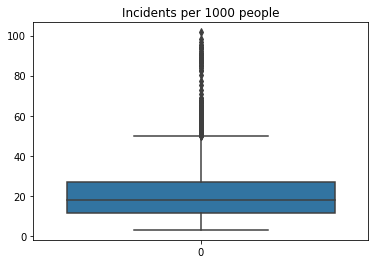

In [426]:
sns.boxplot(data=data.incidents).set_title('Incidents per 1000 people')

Text(0.5, 1.0, 'GDP per capita PPP')

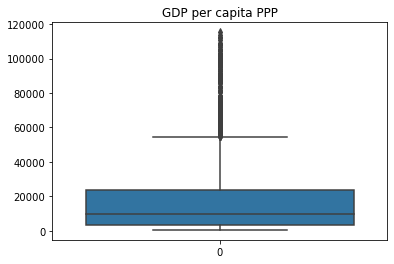

In [427]:
sns.boxplot(data=data.gdppc).set_title('GDP per capita PPP')

Text(0.5, 1.0, 'Share of urban population')

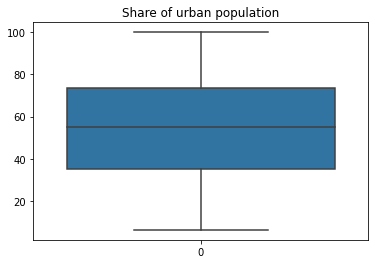

In [428]:
sns.boxplot(data=data.urbpop).set_title('Share of urban population')

In [429]:
data.country=data.country.astype("category")
data.year=data.year.astype("category")
data.year=data.year.astype("category")

In [430]:
countries_grouped = data.groupby("country")

In [431]:
data["lngdppc"] = countries_grouped["gdppc"].transform(np.log)
data["d_lngdppc"] = countries_grouped["lngdppc"].transform("diff")
data["d_incid"] = countries_grouped["incidents"].transform("diff")
data["d_urbpop"] = countries_grouped["urbpop"].transform("diff")
data["lnincid"] = countries_grouped["incidents"].transform(np.log)
data["d_lnincid"] = countries_grouped["lnincid"].transform("diff")

Text(0.5, 1.0, 'Log incidents')

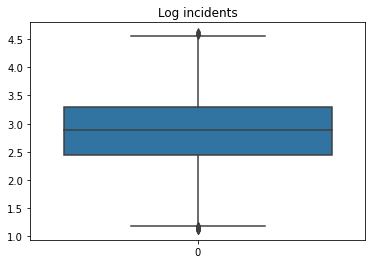

In [432]:
sns.boxplot(data=data.lnincid).set_title('Log incidents')

In [433]:
data.head()

,year,country,ccode,urbpoptotal,urbpop,gdppc,incidents,lngdppc,d_lngdppc,d_incid,d_urbpop,lnincid,d_lnincid
0,1992,Albania,ALB,1209490,37.249,3275.444336,12.885809,8.094209,NaN,NaN,NaN,2.556127,NaN
1,1992,Algeria,DZA,14502589,53.657,8383.770248,33.742905,9.034053,NaN,NaN,NaN,3.518770,NaN
2,1992,Angola,AGO,5067883,40.039,5148.252824,57.157698,8.546413,NaN,NaN,NaN,4.045814,NaN
3,1992,Antigua and Barbuda,ATG,22620,35.085,15497.464744,10.905876,9.648432,NaN,NaN,NaN,2.389302,NaN
4,1992,Argentina,ARG,29352243,87.542,16209.323077,14.077096,9.693342,NaN,NaN,NaN,2.644549,NaN


In [447]:
model = smf.wls("d_lnincid ~ d_urbpop + d_lngdppc + year", data)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
print(fd_lm.summary())
print(fd_lm.params)

                            WLS Regression Results                            
Dep. Variable:              d_lnincid   R-squared:                       0.010
Model:                            WLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.762
Date:                Wed, 07 Apr 2021   Prob (F-statistic):             0.0119
Time:                        15:01:19   Log-Likelihood:                 8517.0
No. Observations:                4393   AIC:                        -1.703e+04
Df Residuals:                    4389   BIC:                        -1.700e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5099      0.229      2.226      0.0

In [435]:
# FD, time trend, 2 year lags

fd_lm_2_cumul_trend_formula = "d_lnincid ~ d_urbpop.shift(0) + d_urbpop.shift(1) + d_urbpop.shift(2) +\
d_lngdppc.shift(0) + d_lngdppc.shift(1) + \
d_lngdppc.shift(2)+ year"

model = smf.wls(
    fd_lm_2_cumul_trend_formula,
    data
)

fd_lm_2_cumul_trend = model.fit(
    cov_type="cluster",
    cov_kwds={"groups":  data.loc[model.data.row_labels, "country"]},
)

fd_lm_2_cumul_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              d_lnincid   R-squared:                       0.037
Model:                            WLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                 6.975e-14
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               1.00
Time:                        14:57:27   Log-Likelihood:                 8504.5
No. Observations:                4355   AIC:                        -1.695e+04
Df Residuals:                    4324   BIC:                        -1.675e+04
Df Model:                          30                                         
Covariance Type:              cluster                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.176e+10   3.63e+16  -3.24e-07      1.000   -7.12e+16    7.12e+16
year[T.1993]        1.176e+10   3.87e+16   3.04e-07      1.000   -7.59e+16    7.59e+16
year[T.1994]        1.176e+10    4.3e+16   2.73e-07      1.000   -8.43e+16    8.43e+16
year[T.1995]        1.176e+10   5.22e+16   2.25e-07      1.000   -1.02e+17    1.02e+17
year[T.1996]        1.176e+10    4.7e+16    2.5e-07      1.000    -9.2e+16     9.2e+16
year[T.1997]        1.176e+10   3.92e+16      3e-07      1.000   -7.67e+16    7.67e+16
year[T.1998]        1.176e+10   4.58e+16   2.57e-07      1.000   -8.97e+16    8.97e+16
year[T.1999]        1.176e+10   5.03e+16   2.34e-07      1.000   -9.86e+16    9.86e+16
year[T.2000]        1.176e+10   4.31e+16   2.73e-07      1.000   -8.45e+16    8.45e+16
year[T.2001]        1.176e+10   4.79e+16   2.45e-07      1.000   -9.39e+16    9.39e+16
year[T.2002]        1.176e+10    4.7e+16    2.5e-07      1.000   -9.21e+16    9.21e+16
year[T.2003]        1.176e+10   4.13e+16   2.85e-07      1.000   -8.09e+16    8.09e+16
year[T.2004]        1.176e+10   4.74e+16   2.48e-07      1.000    -9.3e+16     9.3e+16
year[T.2005]        1.176e+10   3.73e+16   3.15e-07      1.000   -7.32e+16    7.32e+16
year[T.2006]        1.176e+10   4.89e+16    2.4e-07      1.000   -9.59e+16    9.59e+16
year[T.2007]        1.176e+10   4.08e+16   2.88e-07      1.000      -8e+16       8e+16
year[T.2008]        1.176e+10   4.36e+16    2.7e-07      1.000   -8.54e+16    8.54e+16
year[T.2009]        1.176e+10   3.21e+16   3.67e-07      1.000   -6.28e+16    6.28e+16
year[T.2010]        1.176e+10   3.68e+16   3.19e-07      1.000   -7.22e+16    7.22e+16
year[T.2011]        1.176e+10   3.79e+16    3.1e-07      1.000   -7.43e+16    7.43e+16
year[T.2012]        1.176e+10   3.73e+16   3.15e-07      1.000   -7.31e+16    7.31e+16
year[T.2013]        1.176e+10    3.9e+16   3.01e-07      1.000   -7.64e+16    7.64e+16
year[T.2014]        1.176e+10   4.19e+16   2.81e-07      1.000   -8.21e+16    8.21e+16
year[T.2015]        1.176e+10   4.06e+16    2.9e-07      1.000   -7.96e+16    7.96e+16
year[T.2016]        1.176e+10   5.21e+16   2.26e-07      1.000   -1.02e+17    1.02e+17
year[T.2017]        1.176e+10   4.45e+16   2.64e-07      1.000   -8.72e+16    8.72e+16
d_urbpop.shift(0)      0.0081     63.249      0.000      1.000    -123.957     123.973
d_urbpop.shift(1)     -0.0056      9.474     -0.001      1.000     -18.575      18.563
d_urbpop.shift(2)      0.0030     13.221      0.000      1.000     -25.909      25.915
d_lngdppc.shift(0)     0.0129    562.939   2.29e-05      1.000   -1103.327    1103.353
d_lngdppc.shift(1)    -0.0169     89.849     -0.000      1.000    -176.118     176.084
d_lngdppc.shift(2)    -0.0020    129.354  -1.58e-05      1.000    -253.530     253.526
======================================

In [436]:
# FD, time trend, 5 year lags

fd_lm_5_cumul_trend_formula = "d_lnincid ~ d_urbpop.shift(0) + d_urbpop.shift(1) + \
d_urbpop.shift(2)+ d_urbpop.shift(3) + d_urbpop.shift(4) + d_urbpop.shift(5) +  \
d_lngdppc.shift(0) + d_lngdppc.shift(1) + \
d_lngdppc.shift(2)+ d_lngdppc.shift(3) + d_lngdppc.shift(4) + d_lngdppc.shift(5) + \
year"

model = smf.wls(
    fd_lm_5_cumul_trend_formula,
    data
)

fd_lm_5_cumul_trend = model.fit(
    cov_type="cluster",
    cov_kwds={"groups":  data.loc[model.data.row_labels, "country"]},
)

fd_lm_5_cumul_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              d_lnincid   R-squared:                       0.042
Model:                            WLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 6.362e-13
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               1.00
Time:                        14:57:27   Log-Likelihood:                 8416.2
No. Observations:                4305   AIC:                        -1.676e+04
Df Residuals:                    4268   BIC:                        -1.652e+04
Df Model:                          36                                         
Covariance Type:              cluster                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.256e+09   1.37e+16   9.17e-08      1.000   -2.69e+16    2.69e+16
year[T.1993]       -1.256e+09   4.07e+16  -3.09e-08      1.000   -7.98e+16    7.98e+16
year[T.1994]       -1.256e+09   1.14e+16  -1.11e-07      1.000   -2.23e+16    2.23e+16
year[T.1995]       -1.256e+09   3.07e+16   -4.1e-08      1.000   -6.01e+16    6.01e+16
year[T.1996]       -1.256e+09   1.83e+16  -6.88e-08      1.000   -3.58e+16    3.58e+16
year[T.1997]       -1.256e+09        nan        nan        nan         nan         nan
year[T.1998]       -1.256e+09   3.58e+16  -3.51e-08      1.000   -7.02e+16    7.02e+16
year[T.1999]       -1.256e+09   1.01e+16  -1.24e-07      1.000   -1.99e+16    1.99e+16
year[T.2000]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2001]       -1.256e+09   4.98e+16  -2.53e-08      1.000   -9.75e+16    9.75e+16
year[T.2002]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2003]       -1.256e+09   2.81e+16  -4.47e-08      1.000   -5.51e+16    5.51e+16
year[T.2004]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2005]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2006]       -1.256e+09    4.5e+16  -2.79e-08      1.000   -8.81e+16    8.81e+16
year[T.2007]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2008]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2009]       -1.256e+09   8.96e+15   -1.4e-07      1.000   -1.76e+16    1.76e+16
year[T.2010]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2011]       -1.256e+09   2.46e+16  -5.11e-08      1.000   -4.82e+16    4.82e+16
year[T.2012]       -1.256e+09    1.5e+16  -8.38e-08      1.000   -2.94e+16    2.94e+16
year[T.2013]       -1.256e+09        nan        nan        nan         nan         nan
year[T.2014]       -1.256e+09   4.81e+16  -2.61e-08      1.000   -9.43e+16    9.43e+16
year[T.2015]       -1.256e+09   2.12e+16  -5.92e-08      1.000   -4.16e+16    4.16e+16
year[T.2016]       -1.256e+09    7.2e+16  -1.74e-08      1.000   -1.41e+17    1.41e+17
year[T.2017]       -1.256e+09   2.37e+16  -5.31e-08      1.000   -4.64e+16    4.64e+16
d_urbpop.shift(0)      0.0081        nan        nan        nan         nan         nan
d_urbpop.shift(1)     -0.0053        nan        nan        nan         nan         nan
d_urbpop.shift(2)      0.0028        nan        nan        nan         nan         nan
d_urbpop.shift(3)      0.0005      2.728      0.000      1.000      -5.347       5.348
d_urbpop.shift(4)      0.0039        nan        nan        nan         nan         nan
d_urbpop.shift(5)     -0.0033        nan        nan        nan         nan         nan
d_lngdppc.shift(0)     0.0137    323.9

In [437]:
temp = data

In [438]:
temp['Year'] = data["year"].astype("category")

In [439]:
temp.year = pd.to_numeric(temp['year'])

In [440]:
temp = temp.set_index(['country','year'])

In [441]:
temp = temp.sort_values(by=["country","year"])

In [442]:
type(data['year'].iloc[1])

numpy.int64

In [443]:
temp.head()

ccode  urbpoptotal  urbpop        gdppc  incidents   lngdppc  \
country     year                                                                
Afghanistan 2002   AFG      5031157  22.261  1189.784878  51.491959  7.081528   
            2003   AFG      5293385  22.353  1235.810063  50.908370  7.119482   
            2004   AFG      5563504  22.500  1200.278256  49.726770  7.090309   
            2005   AFG      5824291  22.703  1286.793508  47.922386  7.159909   
            2006   AFG      6055019  22.907  1315.789565  46.218807  7.182192   

                  d_lngdppc   d_incid  d_urbpop   lnincid  d_lnincid  Year  
country     year                                                            
Afghanistan 2002        NaN       NaN       NaN  3.941426        NaN  2002  
            2003   0.037954 -0.583589     0.092  3.930027  -0.011398  2003  
            2004  -0.029173 -1.181601     0.147  3.906543  -0.023484  2004  
            2005   0.069600 -1.804384     0.203  3.869583  -0.036961  2005  
            2006   0.022283 -1.703579     0.204  3.833387  -0.036196  2006

In [448]:
###Panel regression
from linearmodels import PanelOLS
fe = PanelOLS.from_formula(
    "lnincid ~ urbpop + lngdppc + TimeEffects + EntityEffects",
    temp
).fit(cov_type="clustered", cluster_entity=True)
print(fe.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lnincid   R-squared:                        0.0158
Estimator:                   PanelOLS   R-squared (Between):             -0.1012
No. Observations:                4572   R-squared (Within):              -0.0354
Date:                Wed, Apr 07 2021   R-squared (Overall):             -0.1012
Time:                        15:45:01   Log-likelihood                    2119.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      35.029
Entities:                         179   P-value                           0.0000
Avg Obs:                       25.542   Distribution:                  F(2,4366)
Min Obs:                       16.000                                           
Max Obs:                       26.000   F-statistic (robust):             2.2443
                            

In [445]:
# Long difference

model = smf.wls("d_lnincid ~ d_urbpop + d_lngdppc", data.query("year == 1992 | year == 2017"))
longd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data.loc[model.data.row_labels, "country"]},
)
longd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              d_lnincid   R-squared:                       0.041
Model:                            WLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.294
Date:                Wed, 07 Apr 2021   Prob (F-statistic):             0.0151
Time:                        14:57:28   Log-Likelihood:                 513.62
No. Observations:                 179   AIC:                            -1021.
Df Residuals:                     176   BIC:                            -1012.
Df Model:                           2                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0102      0.002     -5.512      0.000      -0.014      -0.007
d_urbpop      -0.0094      0.004     -2.633      0.008      -0.016      -0.002
d_lngdppc     -0.0402      0.030     -1.332      0.183      -0.099       0.019
==============================================================================
Omnibus:                       29.255   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.800
Skew:                          -0.510   Prob(JB):                     3.20e-25
Kurtosis:                       6.753   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [452]:
data_developed = data[data.gdppc >= 12536]
data_developing = data[data.gdppc < 12536]

In [457]:
len(data)

4572

In [453]:
len(data_developed)

1864

In [454]:
len(data_developing)

2708

In [455]:
model = smf.wls("d_lnincid ~ d_urbpop + d_lngdppc + year", data_developed)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data_developed.loc[model.data.row_labels, "country"]},
)
print(fd_lm.summary())
print(fd_lm.params)

                            WLS Regression Results                            
Dep. Variable:              d_lnincid   R-squared:                       0.017
Model:                            WLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.157
Date:                Wed, 07 Apr 2021   Prob (F-statistic):             0.0985
Time:                        16:01:27   Log-Likelihood:                 3484.2
No. Observations:                1811   AIC:                            -6960.
Df Residuals:                    1807   BIC:                            -6938.
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3769      0.313     -1.203      0.2

In [456]:
model = smf.wls("d_lnincid ~ d_urbpop + d_lngdppc + year", data_developing)
fd_lm = model.fit(
    cov_type="cluster",
    cov_kwds={"groups": data_developing.loc[model.data.row_labels, "country"]},
)
print(fd_lm.summary())
print(fd_lm.params)

                            WLS Regression Results                            
Dep. Variable:              d_lnincid   R-squared:                       0.007
Model:                            WLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.067
Date:                Wed, 07 Apr 2021   Prob (F-statistic):             0.0304
Time:                        16:01:41   Log-Likelihood:                 5171.9
No. Observations:                2582   AIC:                        -1.034e+04
Df Residuals:                    2578   BIC:                        -1.031e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5223      0.322      1.623      0.1